In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [80]:
trainset = pd.read_csv('../input/train.csv')
testset = pd.read_csv('../input/test.csv')


In [81]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [82]:
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
trainset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pernot, Mr. Rene",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [84]:
trainset[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [85]:
trainset[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [86]:
trainset[['Age','Survived']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


In [87]:
trainset[['Fare','Survived']].groupby('Survived').mean()

,Fare
Survived,
0,22.117887
1,48.395408


In [88]:
trainset[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [89]:
trainset[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [90]:
trainset[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


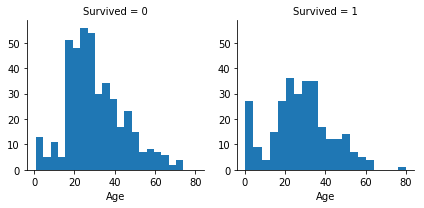

In [91]:
grid = sns.FacetGrid(trainset,col='Survived')
grid.map(plt.hist,'Age',bins=20)

In [92]:
trainset = trainset.drop(['Ticket','Cabin'],axis=1)
testset = testset.drop(['Ticket','Cabin'],axis=1)

In [93]:
trainset = trainset.drop('PassengerId',axis=1)
testset = testset.drop('PassengerId',axis=1)

In [94]:
trainset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [95]:
trainset['Title']=trainset['Name'].map(lambda x: x.split(', ')[1].split('.')[0])

In [96]:
testset['Title']=testset['Name'].map(lambda x: x.split(', ')[1].split('.')[0])

In [97]:
trainset['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Sir               1
the Countess      1
Capt              1
Don               1
Lady              1
Mme               1
Jonkheer          1
Name: Title, dtype: int64

In [98]:
pd.crosstab(trainset['Title'],trainset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [99]:
both = [trainset,testset]

In [103]:
for dataset in both:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [104]:
pd.crosstab(trainset['Title'],trainset['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [105]:
trainset[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [106]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [107]:
trainset['Title']=trainset['Title'].map({'Mr':1, 'Rare':2,'Master':3,'Miss':4,'Mrs':5})

In [109]:
testset['Title']=testset['Title'].map({'Mr':1, 'Rare':2,'Master':3,'Miss':4,'Mrs':5})

In [108]:
trainset['Title'].value_counts()

1    517
4    185
5    126
3     40
2     23
Name: Title, dtype: int64

In [110]:
for dataset in both:
    dataset['Sex']=dataset['Sex'].map({'male':1,'female':0})

In [117]:
for dataset in both:
    for i in range(1,4):
        for j in range(0,2):
            median = dataset[(dataset['Sex']==j) & (dataset['Pclass']==i)]['Age'].dropna().median()
            dataset.loc[(dataset['Sex']==j) & (dataset['Pclass']==i) & (dataset['Age'].isna()),'Age'] = median

In [126]:
trainset['Age'].value_counts().head()

25.0    117
21.5     42
40.0     34
30.0     34
24.0     30
Name: Age, dtype: int64

In [133]:
for dataset in both:
    dataset['Family']= dataset['Parch'] + dataset['SibSp'] + 1

In [136]:
trainset[['Family','Survived']].groupby('Family').mean().sort_values('Survived',ascending=False)

,Survived
Family,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [137]:
for dataset in both:
    dataset['isAlone'] = dataset['Family'].map(lambda x: int(x==1))
    

In [139]:
dataset['isAlone'].value_counts()

1    253
0    165
Name: isAlone, dtype: int64

In [141]:
trainset[['isAlone','Survived']].groupby('isAlone').mean()

,Survived
isAlone,
0,0.505650
1,0.303538


In [158]:
trainset = trainset.drop(['Parch', 'SibSp', 'Family'], axis=1)
testset = testset.drop(['Parch', 'SibSp', 'Family'], axis=1)

KeyError: "['Parch' 'SibSp' 'Family'] not found in axis"

In [159]:
both = [trainset, testset]

In [160]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
isAlone     891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [161]:
for dataset in both:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [162]:
for dataset in both:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [163]:
trainset['Embarked'].head(20)

0     0
1     1
2     0
3     0
4     0
5     2
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    0
18    0
19    1
Name: Embarked, dtype: int64

In [164]:
trainset.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,1,5,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,0,4,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,0,5,0
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,0,1,1


In [173]:
X_train = trainset.drop('Survived',axis=1)
X_test = testset
Y_train = trainset['Survived']

KeyError: "['Name,axis=1'] not found in axis"

In [177]:
X_test = X_test.drop('Name',axis=1)

In [178]:
X_train.shape

(891, 7)

In [179]:
Y_train.shape

(891,)

In [180]:
X_test.shape

(418, 7)

In [171]:
model = LogisticRegression()

In [181]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [183]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Fare        417 non-null float64
Embarked    418 non-null int64
Title       418 non-null int64
isAlone     418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [184]:
X_test.loc[X_test['Fare'].isna(),'Fare']=X_test['Fare'].median()

In [185]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int64
Title       418 non-null int64
isAlone     418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [186]:
Y_pred = model.predict(X_test)

In [188]:
trainsetaccuracy = round(model.score(X_train, Y_train) * 100, 2)

In [189]:
trainsetaccuracy

81.26

In [190]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [191]:
model.coef_

array([[-1.24307414,  0.14410386, -0.03298649,  0.00134069,  0.30862236,
         0.92058501,  0.56197876]])

In [192]:
coeffs = pd.DataFrame(X_train.columns)

In [194]:
coeffs['Param']=model.coef_[0]

In [198]:
coeffs.sort_values(by='Param',ascending= False)

,0,Param
5,Title,0.920585
6,isAlone,0.561979
4,Embarked,0.308622
1,Sex,0.144104
3,Fare,0.001341
2,Age,-0.032986
0,Pclass,-1.243074


**^ Probably Overfit**